<a href="https://colab.research.google.com/github/willkwon-math/class-for-deeplearning/blob/master/pytorch_book(linear).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install torch

In [ ]:
import torch


X = torch.Tensor(2,3)
X.shape

torch.Size([2, 3])

In [ ]:
X = torch.tensor([[1,2,3],[4,5,6]])
print(X)

tensor([[1, 2, 3],
        [4, 5, 6]])


In [ ]:
x = torch.tensor(data=[2.0, 3.0], requires_grad=True)
y = x**2
z = 2*y +3

target = torch.tensor([3.0,4.0])
loss = torch.sum(torch.abs(z-target))
loss.backward()

print(x.grad, y.grad, z.grad)

tensor([ 8., 12.]) None None


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations.
  if __name__ == '__main__':


In [ ]:
## 선형회귀분석

import torch 
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init

## generating the data

num_data = 1000
num_epoch = 500
loss_arr = []

x=init.uniform_(torch.Tensor(num_data,1),-10,10)
noise = init.normal_(torch.FloatTensor(num_data,1),std=1)
y = 2*x+3
y_noise = 2*(x+noise)+3

# model

model = nn.Linear(1,1) #특성수
loss_func = nn.L1Loss()
optimizer = optim.SGD(model.parameters(),lr=0.01)

#learning

label = y_noise
for i in range(num_epoch):
  optimizer.zero_grad()
  output = model(x)

  loss = loss_func(output,label)
  loss.backward()
  optimizer.step()

  if i % 10 ==0:
    print(loss.data)
  loss_arr.append(loss.detach().numpy())
  
param_list = list(model.parameters())
print(param_list[0].item(),param_list[1].item())

tensor(13.0910)
tensor(10.6836)
tensor(8.4178)
tensor(6.4434)
tensor(4.9893)
tensor(4.2495)
tensor(3.9400)
tensor(3.7787)
tensor(3.6615)
tensor(3.5597)
tensor(3.4661)
tensor(3.3804)
tensor(3.3005)
tensor(3.2231)
tensor(3.1482)
tensor(3.0758)
tensor(3.0051)
tensor(2.9356)
tensor(2.8682)
tensor(2.8028)
tensor(2.7400)
tensor(2.6789)
tensor(2.6203)
tensor(2.5647)
tensor(2.5105)
tensor(2.4581)
tensor(2.4074)
tensor(2.3577)
tensor(2.3099)
tensor(2.2651)
tensor(2.2231)
tensor(2.1833)
tensor(2.1454)
tensor(2.1090)
tensor(2.0746)
tensor(2.0419)
tensor(2.0118)
tensor(1.9838)
tensor(1.9576)
tensor(1.9333)
tensor(1.9108)
tensor(1.8896)
tensor(1.8701)
tensor(1.8523)
tensor(1.8351)
tensor(1.8186)
tensor(1.8033)
tensor(1.7887)
tensor(1.7751)
tensor(1.7621)
2.009838581085205 2.188286066055298


torch.nn.Linear(in_features: int, out_features: int, bias: bool = True)

- In_features -size of each input sample
- out_features - size of each output sample

=> nn.Linear(1,1) - input sample =1, outsample =1, bias true

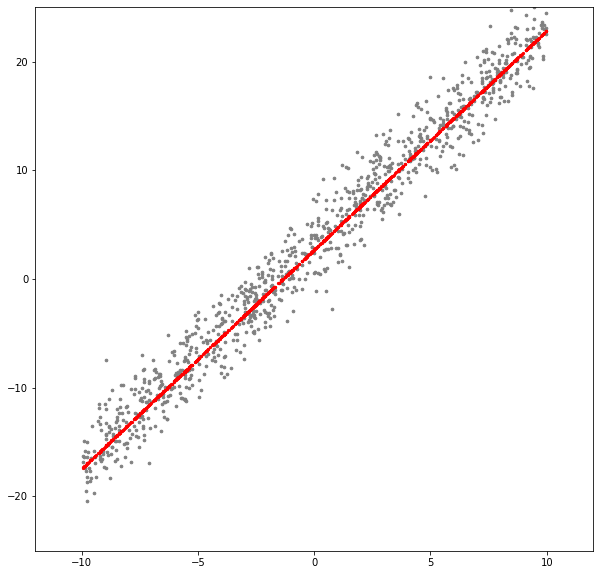

In [ ]:
##visualization

import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.scatter(x.numpy(),y_noise.numpy(), s=7, c="gray")
plt.scatter(x.detach().numpy(),output.detach().numpy(), s=5, c="red")
plt.axis([-12,12,-25,25])
plt.show()

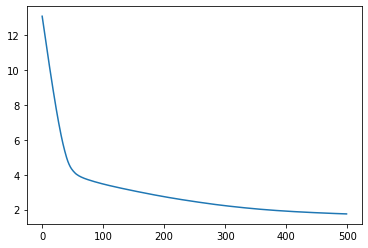

In [ ]:
plt.plot(loss_arr)
plt.show()